In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def table22(data):
    table = np.zeros(4)
    
    for i in range(len(data)):
        table[int(data[i])] += 1
        
    return table

def chi22(table):
    a = table[0]; b = table[1]; c = table[2]; d = table[3]
    
    if a+b == 0 or c+d == 0:
        T = 0
    else:
        T = ((a-b)**2)/(a+b) + ((c-d)**2)/(c+d)
    
    return T

In [3]:
def generateData(N):
    gp = np.zeros((N,2))
    
    for i in range(N):
        gp[i][0] = random.randint(0,2)
        gp[i][1] = random.randint(0,1)
        
    data22 = np.zeros(2*N)

    for i in range(N):
        if gp[i][0] == 0 and gp[i][1] == 0:
            data22[int(2*i)] = 0; data22[int(2*i)+1] = 0
        elif gp[i][0] == 0 and gp[i][1] == 1:
            data22[int(2*i)] = 1; data22[int(2*i)+1] = 1
        elif gp[i][0] == 1 and gp[i][1] == 0:
            data22[int(2*i)] = 0; data22[int(2*i)+1] = 2
        elif gp[i][0] == 1 and gp[i][1] == 1:
            data22[int(2*i)] = 1; data22[int(2*i)+1] = 3
        elif gp[i][0] == 2 and gp[i][1] == 0:
            data22[int(2*i)] = 2; data22[int(2*i)+1] = 2
        else:
            data22[int(2*i)] = 3; data22[int(2*i)+1] = 3
    
    return data22

In [4]:
N = 1000; M = 100
stats22 = np.zeros(M)

for i in range(M):
    data = generateData(N)
    stats22[i] = chi22(table22(data))

sstats22 = sorted(stats22, reverse=True)

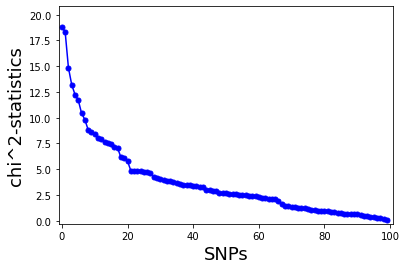

In [5]:
index = np.zeros(M)
for i in range(M):
    index[i] = i

fig = plt.figure()
plt.ylim(-0.3, np.max(sstats22)+2)
plt.xlim(-1, 101)
plt.plot(index, sstats22, marker="o", markersize=5, color = "blue", linestyle = "-")
plt.xlabel("SNPs", fontsize = 18)
plt.ylabel("chi^2-statistics", fontsize = 18)
fig.savefig("statsDistribution.png")
fig.savefig("figs/statsDistribution.eps", bbox_inches="tight", pad_inches=0.05)